#### Few initial words -

In this note book, we would try to do an exploratory data analysis on "NYC Taxi trip duration" problem. So, from model building life cycle, we would be doing the following steps in order - 
(a) Problem Definition, (b) Hypothesis Generation, (c) Data Extraction and Collection, and (d) Data Exploration and Transformation. Predictive Modeling and Model Deployment/Implementation would be out of scope for us now.

#### Problem Definition - 

NYC taxi Company wants us to help predict ride duration of the taxi trips, so that they can plan their fleet accordingly.

As we are not yet building the ML models, we would not be be able to predict the trip duration in true sense. But seeing historical data, we can gain and plot insights from it. The trips can be drilled down by different times of a day, different days of months, different days of weeks etc. So the insights can then indirectly depict/assist to plan the fleet while similar variations come in future.

#### Hypothesis Generation - 

1. Mostly how many persons together ride our cars (what is the most expected number of persons to be in a given car/expected size of the cars for most of the demands) ? As accordingly NYC tax company can arrange the fleet and suitable cars. Most fuel efficient cars can be used if we already know the expected size of the car and the duration requested.
2. How many (in average) cars would be expected to be available at different times of a day across an year (expected number of cars based upon historical data) ?
3. How does the demand for duration varry during the dates of a given month ? Are there specific dates where customers are more looking for longer trips ?
4. How does the demand for trip duration varry across the days of months. Are trips on specific week days or week ends heavily sought after ?
5. How does demand for trips varry over location and time ? Are people looking more for cars at specific parts of the city ?
6. How does the store and forward flag varies over months and days ? Or more specifically, how often the cars are going out of network ? Are there any specific patterns ?

#### Data Extraction and Collection - initial words - 

As part of the project, the required data is given in a single file in the form of a csv file. So, that means, our data collection process would be rather simple, and we won't be required to collect and combine/merge data from divergent sources.

#### Data Extraction and Collection - Read csv file in a data frame - 

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("nyc_taxi_trip_duration.csv")
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


So, above steps show us that the data was in form of a normal csv file, with no specific extra line headers, nor with anything other than comma delimeter. So that means the data looks clearly separable across columns and apparently a single column doesn't hold data of multiple columns, which we often see if we try to load data with different csv separator (while used with default read_csv).

#### Data Exploration and Transformation - 

#### Data Exploration and Transformation - Column Types - 

In [2]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

#### Data Exploration and Transformation - Column Types - Observation/Transformation 1 - 

Datetime columns should be converted to the datetime objects, otherwise datetime manipulation and extraction would become difficult. So, let's first convert them to datetime objects.

In [3]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

#### Data Exploration and Transformation - Column Types - Observation/Transformation 2 -

Let's now create few columns from datetime columns. We normally tell this step as a part of feature engineering. Let's create day of week, day of month, month from the datetime objects. Why we would like to create such features ? Because we would like to observe and analyze the trip variabilities depending upon start/end of weeks, start/end of months or may be during different parts of the year.

In [4]:
df['pickup_datetime'] = df['pickup_datetime'].dt.round('15min')
df['dropoff_datetime'] = df['dropoff_datetime'].dt.round('15min')


df['pickup_day'] = df['pickup_datetime'].dt.day_name()
df['pickup_month'] = df['pickup_datetime'].dt.month_name()
df['pickup_date'] = df['pickup_datetime'].dt.day
df['pickup_time'] = df['pickup_datetime'].dt.hour
df['dropoff_day'] = df['dropoff_datetime'].dt.day_name()
df['dropoff_month'] = df['dropoff_datetime'].dt.month_name()
df['dropoff_date'] = df['dropoff_datetime'].dt.day
df['dropff_time'] = df['dropoff_datetime'].dt.hour

df.drop(['pickup_datetime', 'dropoff_datetime'], inplace = True, axis = 1)

df['pickup_month'] = df['pickup_month'].astype('category')
df['pickup_day'] = df['pickup_day'].astype('category')
df['dropoff_month'] = df['dropoff_month'].astype('category')
df['dropoff_day'] = df['dropoff_day'].astype('category')

month_map = {
    'January':'Jan',
    'February':'Feb',
    'March':'Mar',
    'April':'Apr',
    'May':'May',
    'June':'Jun'
}

df['pickup_month'] = df['pickup_month'].map(month_map)
df['dropoff_month'] = df['dropoff_month'].map(month_map)
df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_date,pickup_time,dropoff_day,dropoff_month,dropoff_date,dropff_time
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Feb,29,16,Monday,Feb,29,16
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Mar,11,23,Saturday,Mar,12,0
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Feb,21,18,Sunday,Feb,21,18
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,Jan,5,9,Tuesday,Jan,5,10
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,Feb,17,6,Wednesday,Feb,17,7


Please note, we have categorized the month name and day name. But we have not encoded those as our tasks would be limited to EDA only and the names would be more intuitive in visualizations. But in case we are required to build ML models, we would probably need to encode those as ML model would expect numbers in them. Later we abbreviated month names to that of containing three characters only so as to ease visualization. Please also note that, we have rounded the datetime object to nearest 15 mins and extracted hour from it. Idea is, we would like to see if there's any concentration of booking at some specific hours of a day or so.

#### Data Exploration and Transformation - Column Types - Observation/Transformation 3 -

We want to calculate distance travelled from the lat-long. For that, we referred the following stackoverflow item (and used per our case) -
https://stackoverflow.com/questions/40452759/pandas-latitude-longitude-to-distance-between-successive-rows

In [5]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))


df['distance_travelled'] = \
    haversine(df.pickup_latitude, df.pickup_longitude,
                 df.dropoff_latitude, df.dropoff_longitude)
df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_date,pickup_time,dropoff_day,dropoff_month,dropoff_date,dropff_time,distance_travelled
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Feb,29,16,Monday,Feb,29,16,1.199073
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Mar,11,23,Saturday,Mar,12,0,4.129111
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Feb,21,18,Sunday,Feb,21,18,7.250753
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,Jan,5,9,Tuesday,Jan,5,10,2.361097
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,Feb,17,6,Wednesday,Feb,17,7,4.328534


#### Data Exploration and Transformation - Column Types - Observation/Transformation 4 -

Trip duration in seconds isn't very intuitive, let's convert it into minutes.

In [6]:
df['trip_duration'] = df['trip_duration']/60
df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_date,pickup_time,dropoff_day,dropoff_month,dropoff_date,dropff_time,distance_travelled
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,N,6.666667,Monday,Feb,29,16,Monday,Feb,29,16,1.199073
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,N,18.333333,Friday,Mar,11,23,Saturday,Mar,12,0,4.129111
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,N,27.250000,Sunday,Feb,21,18,Sunday,Feb,21,18,7.250753
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,N,19.016667,Tuesday,Jan,5,9,Tuesday,Jan,5,10,2.361097
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,N,14.133333,Wednesday,Feb,17,6,Wednesday,Feb,17,7,4.328534


#### Data Exploration and Transformation - Null value Treatment -

In [7]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 18 columns):
id                    729322 non-null object
vendor_id             729322 non-null int64
passenger_count       729322 non-null int64
pickup_longitude      729322 non-null float64
pickup_latitude       729322 non-null float64
dropoff_longitude     729322 non-null float64
dropoff_latitude      729322 non-null float64
store_and_fwd_flag    729322 non-null object
trip_duration         729322 non-null float64
pickup_day            729322 non-null category
pickup_month          729299 non-null object
pickup_date           729322 non-null int64
pickup_time           729322 non-null int64
dropoff_day           729322 non-null category
dropoff_month         729242 non-null object
dropoff_date          729322 non-null int64
dropff_time           729322 non-null int64
distance_travelled    729322 non-null float64
dtypes: category(2), float64(6), int64(6), object(4)
memory usage: 90.4+ MB

The data doesn't contain null values as each of the non-null value counts equals the total number of rows.

#### Data Exploration and Transformation - Hypothesis validation - Do we have entire year's data, or we are concentrating on a subset ?

In [8]:
df['pickup_month'].value_counts()

Mar    128308
Apr    125624
May    124223
Feb    119362
Jun    117393
Jan    114389
Name: pickup_month, dtype: int64

This means we are considering the data from Jan to June. And we would be concentrating mostly on two seasons, winter (Jan - Mar) and summer (April - June).

#### Data Exploration and Transformation - Hypothesis validation - Mostly how many persons together ride our cars ? As accordingly NYC tax company can arrange the fleet and suitable cars - 

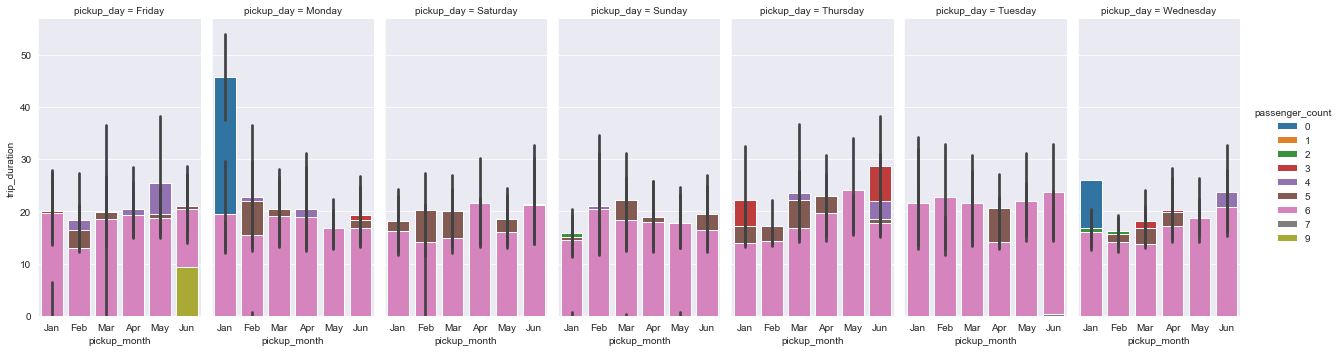

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

g = sns.FacetGrid(df, col="pickup_day", height=5, aspect=.5, hue="passenger_count")
g.map(sns.barplot, "pickup_month", "trip_duration", order=["Jan", "Feb", "Mar", "Apr", "May", "Jun"])
g.add_legend()

So, looks like mostly the passenger count is around six (6) and most trip durations are around 20 to 30 minutes. This signifies an important point, are most of the cars get utilized by the office goers or used as shuttles ? May be due to the scarcity of the parking spaces during office hours. Or this fleet might have been used by the friends for casual outing around the city. And probably the riders use their own vehicles for long distance commutes. Is it because of the high charges for the cars in the fleet, or unavailability of the cars in the fleet or drivers for long rides ? 

Please refer the zero (0) passenger rides with high variability during the mondays of january. Is it because, in this case the car went outside the city and didn't get any rides for good thirty (30) minutes ? We are seeing similar pattern during wednesdays for january. These might dictate a plan for improvement in terms of utilization of the fleet.

If mostly the cars get utilized by six (6) people or more, then the fleet should contain high concentration of big fuel efficient cars that can withstand the traffic and frequent stops in and around the city.

#### Data Exploration and Transformation - Hypothesis validation - How many (in average) cars would be expected to be available at different times of a day across an year ?

<AxesSubplot:xlabel='pickup_day', ylabel='pickup_month-pickup_time'>

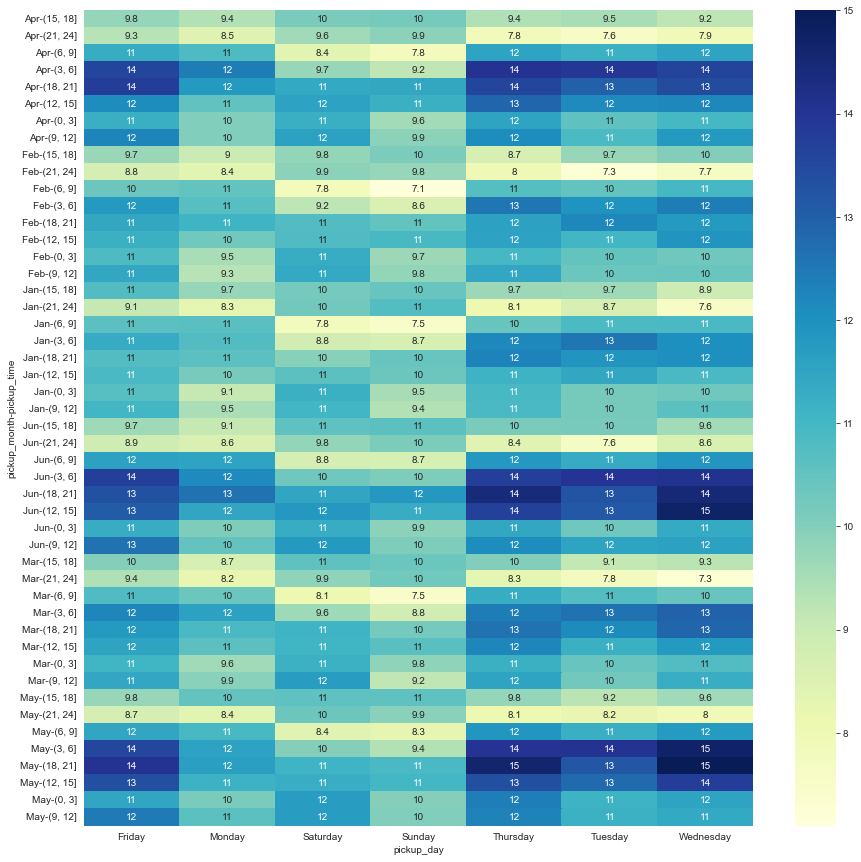

In [10]:
time_of_day = pd.cut(df['pickup_time'], [0, 3, 6, 9, 12, 15, 18, 21, 24])
pt = df.pivot_table('trip_duration', ['pickup_month', time_of_day], 'pickup_day', aggfunc='median')
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(pt, cmap="YlGnBu", annot=True, ax = ax)

Per the heatmap, darker shades represent higher median concentration of cars. Relatively overall lighter shades around saturdays and sundays do indicate major car fleet usage during weekdays. More car usage is clearly observed between 3 to 6 am, from the months of april to june. Its been told that NYC never sleeps at night, may be the fleet of cars is often used for commutes in late night parties. And this is more in this months, as the weather is comparatively hotter than the cold months of Jan. Also, 9 to 12 pm is a range of time, while the ask for the cars is the lowest.

During summar months, that is from april to june, we see heavy usage between 6 to 9 pm. Probably that's office returning time. And we see moderate usage during office going time, as probably that varies and distributed over a longer range of time. During winter months, there could be a tendency to be within indoors and possibly doing work from home.

#### Data Exploration and Transformation - Hypothesis validation via plot - How does the demand varry during the dates of a given month ? Can we get some insights ?

<AxesSubplot:xlabel='pickup_day', ylabel='pickup_month-pickup_date'>

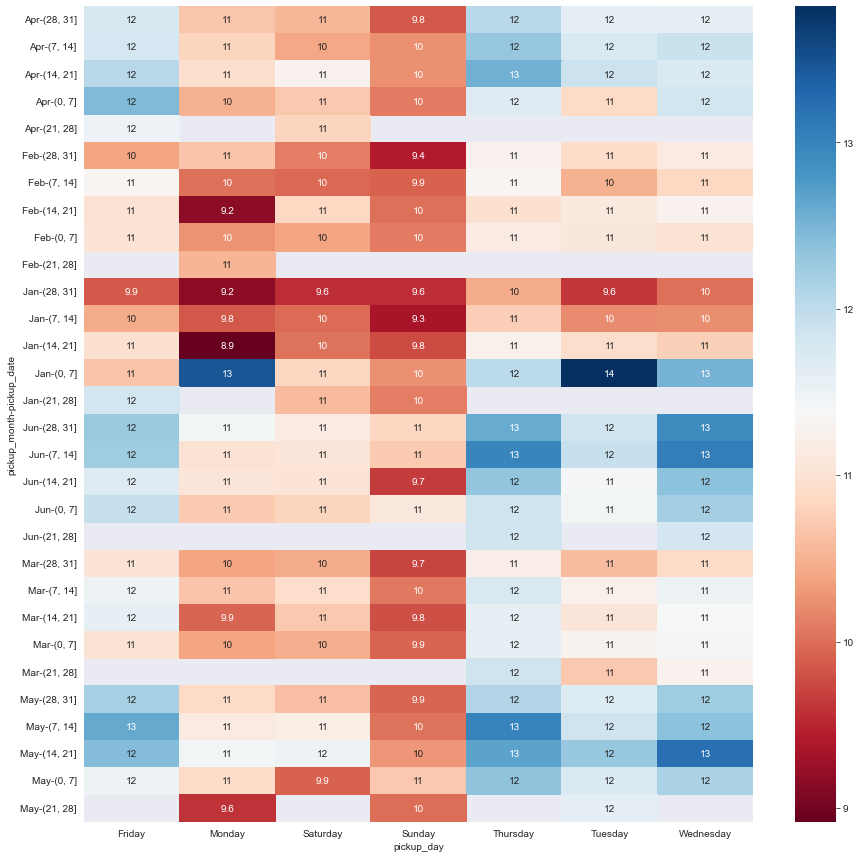

In [11]:
pickup_date = pd.cut(df['pickup_date'], [0, 7, 14, 21, 28, 31])
pt = df.pivot_table('trip_duration', ['pickup_month', pickup_date], 'pickup_day', aggfunc='median')
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(pt, cmap="RdBu", annot=True, ax = ax)

Here we are trying to see the distribution over different dates of the months, spanning over week days and weekend days. Here we have chosen the colors so that we can easily identify the highest and lowest demands. Lowest is indicated by dark red and highest, by dark blue.

We are seeing that for the last few days of every month (28 to 31), in sundays, we tend to be having lowest of the demands. Probably because, being month end, people usually try to keep the funds with them and avoid incurring extra expenses over the sundays.

Otherwise, more or less, weekdays have regular demands, while during mondays, we are seeing a downward trend. May be because people tend to entend their leaves on mondays and may be they prefer being in indoors/doing work from home on those days.

#### Data Exploration and Transformation - How does the demand varry across the days of months ?

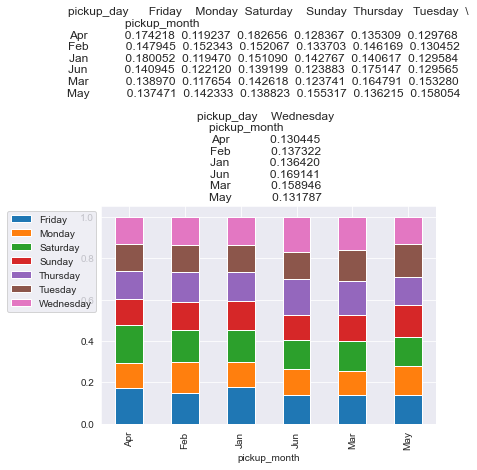

In [43]:
ax = df.groupby('pickup_month')['pickup_day'].value_counts(normalize = True).unstack()
ax.plot(kind='bar', stacked = True, title = str(ax));
plt.legend(bbox_to_anchor=(0, 1), loc='best', ncol=1)

This is an interesting visualization. Demands on fridays are most during jan and april, for thursdays & wednesdays, its march and june. Sundays & mondays in the month of march and june yield least demands for the fleet of the cars. Likewise, the plan for the number of cars in fleet can be designed so as to target maximum utilization, by keeping in mind of the historical trends.

#### Data Exploration and Transformation - How does demand vary over location and time ?

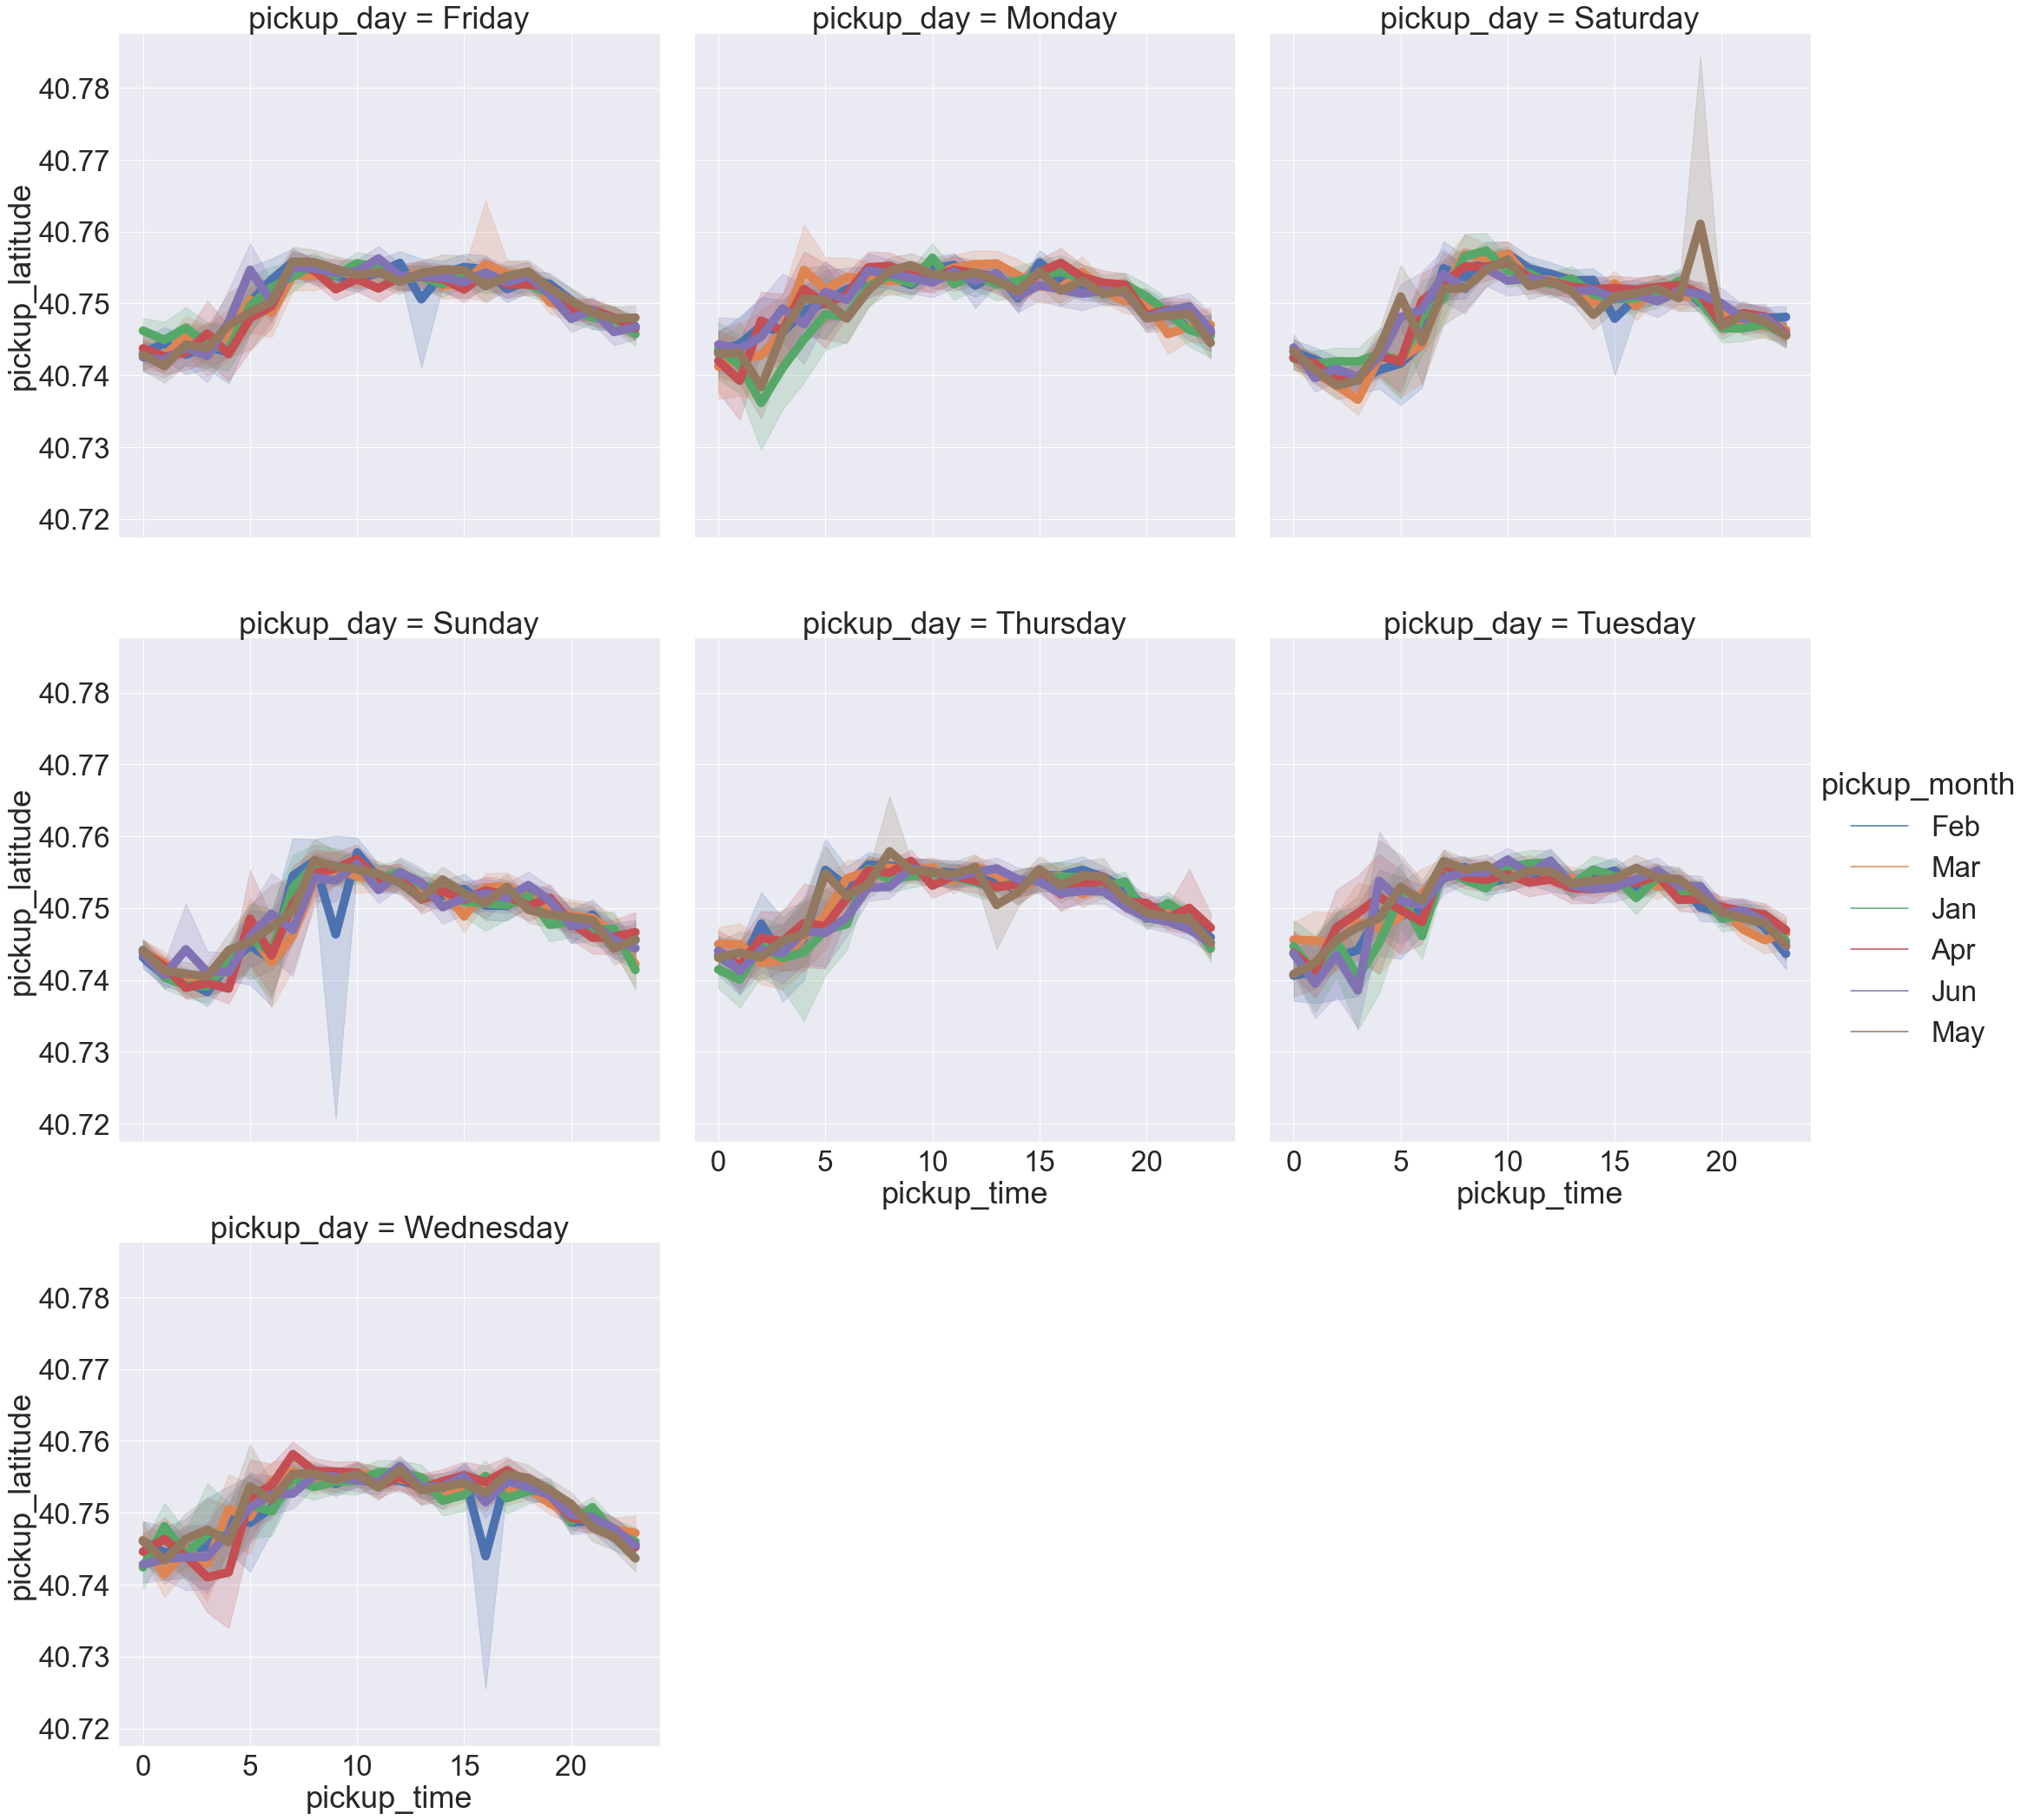

In [64]:
sns.set(font_scale = 3)
sns.relplot(x="pickup_time", y="pickup_latitude", hue="pickup_month",
            col="pickup_day", col_wrap=3,
            height=10, linewidth=10,
            kind="line", data=df);

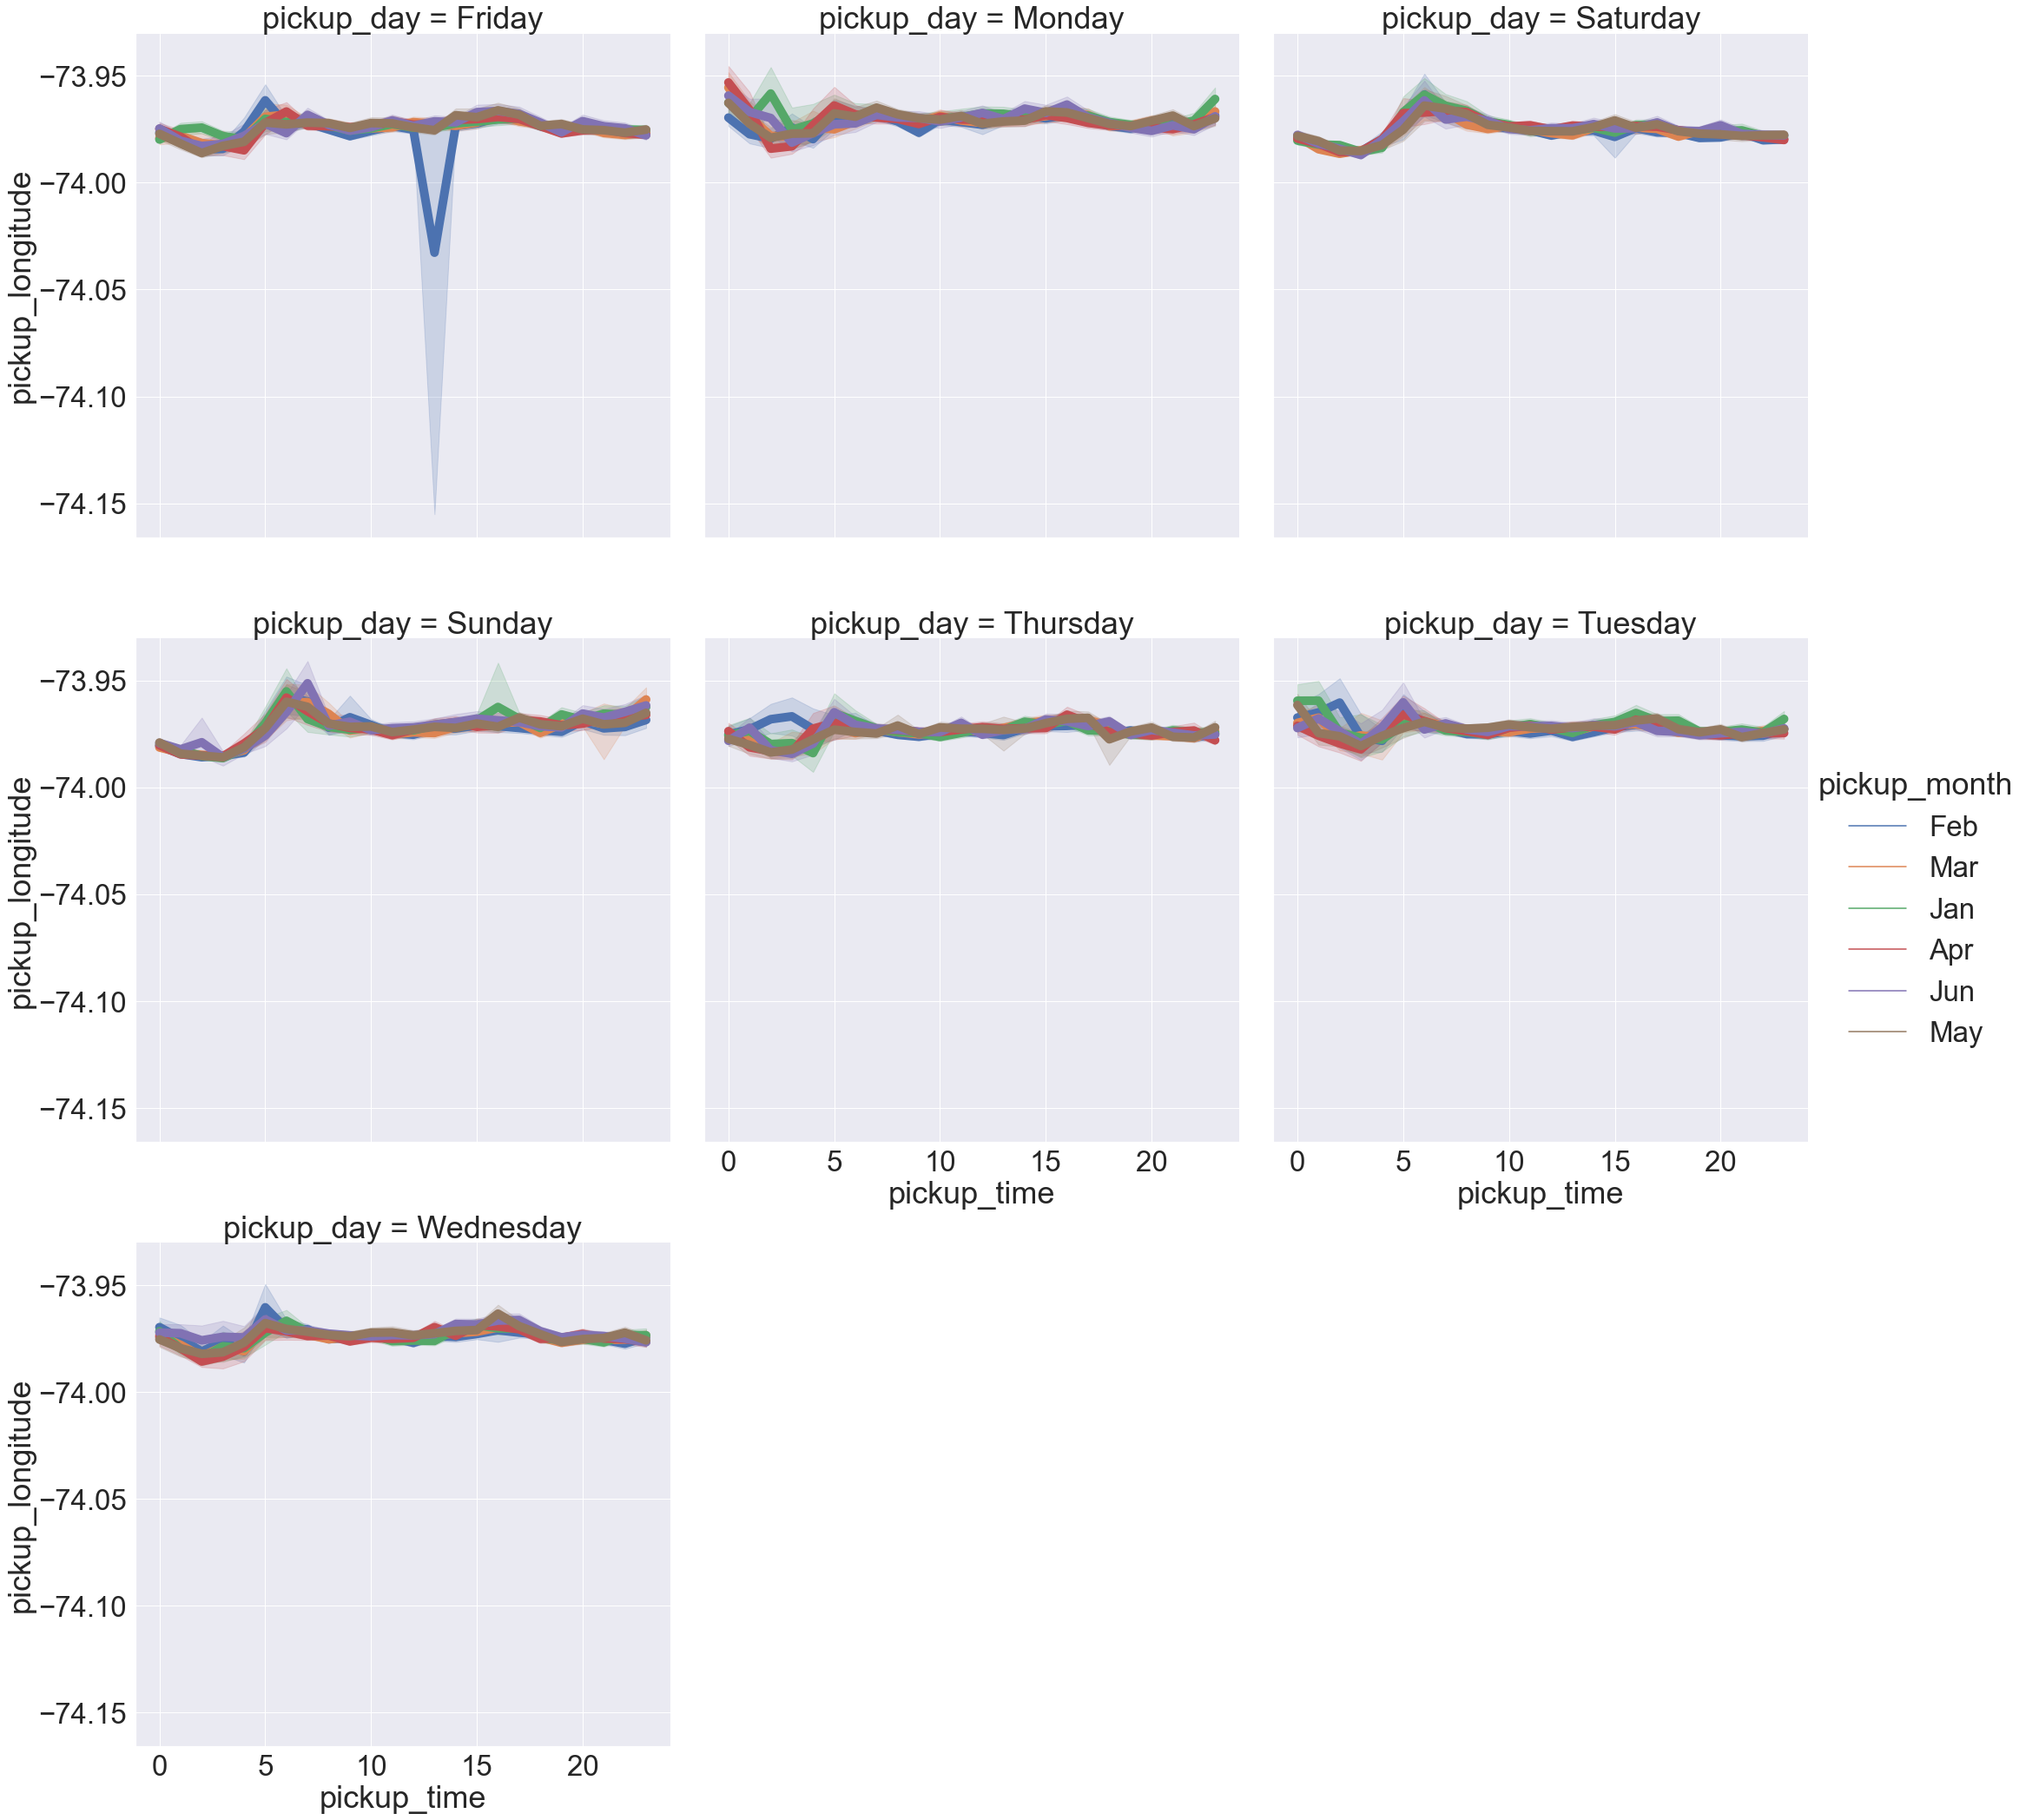

In [66]:
sns.set(font_scale = 3)
sns.relplot(x="pickup_time", y="pickup_longitude", hue="pickup_month",
            col="pickup_day", col_wrap=3,
            height=10, linewidth=10,
            kind="line", data=df);

The above plots try to identify hotspot pickup areas (lat-long) plotted against individual days of weeks and pickup time ranges. High demand sections would obviouly involve more availability of the fleet of cars.

#### Data Exploration and Transformation - How does the store and forward flag varies over months and days ?

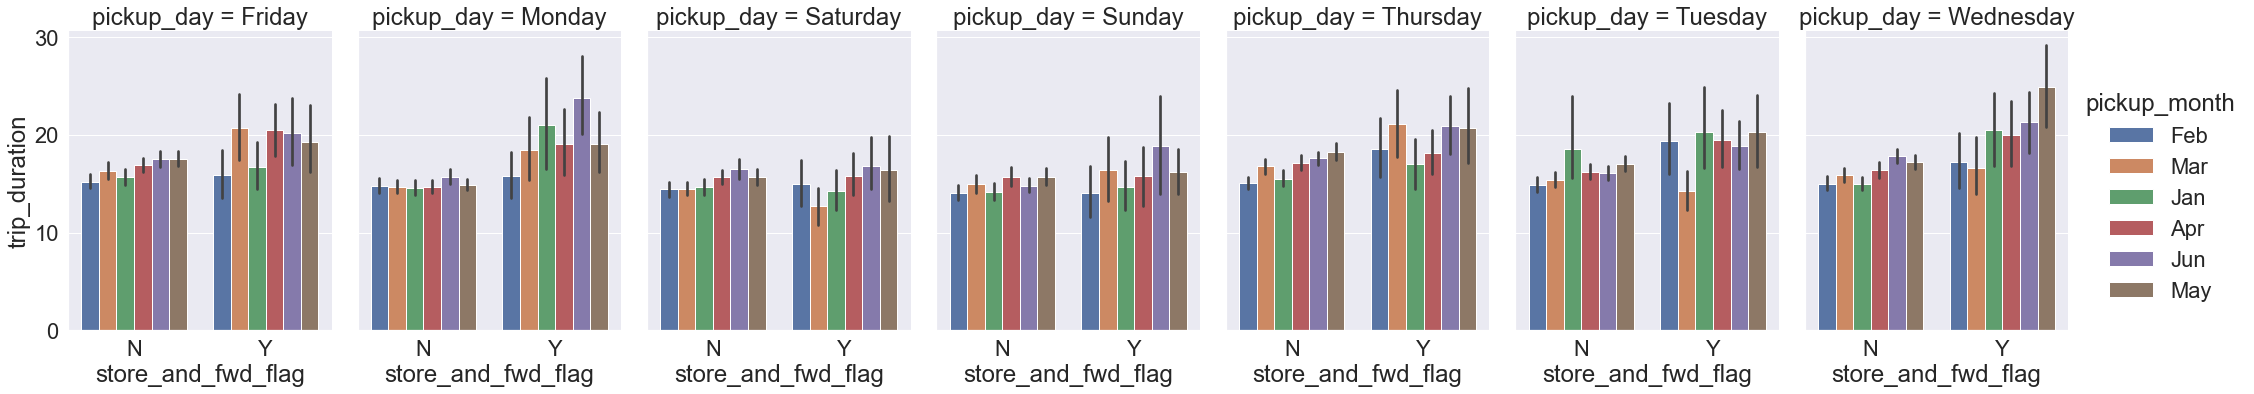

In [73]:
sns.set(font_scale = 2)
sns.catplot(x="store_and_fwd_flag", y="trip_duration",
                hue="pickup_month", col="pickup_day", 
                data=df, kind="bar",
                height=6, aspect=.7);

The plot shows the reduced usage of store and forward feature during weekends. That means, mostly during weekends, the vehicles were within network coverage, while compared with the weekdays cases. This might indicate that, the fleet of the cars probably more used during weekdays, and its usage might be limited to an extent during weekends.